**Area of circle with radius r:**<br>
$A_\mathrm{c}=\pi \cdot r^2$<br>
**Area of square with length r:**<br>
$A_\mathrm{s}=r^2$<br>
**Estimate of $\pi$:**<br>
$\pi=\dfrac{A_\mathrm{c}}{A_\mathrm{s}}$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# create n random points between 0 and 1
n = 300
x = np.random.random(n)
y = np.random.random(n)

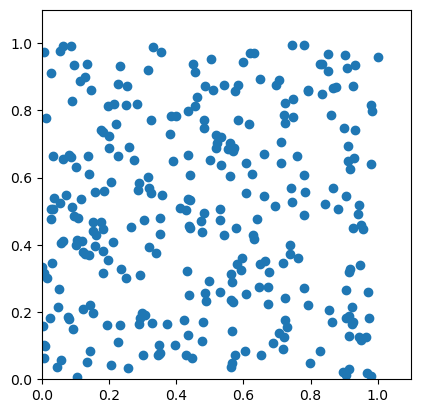

In [7]:
# plot the random datapoints
plt.scatter(x, y)

plt.xlim([0, 1.1])
plt.ylim([0, 1.1])

ax = plt.gca()
ax.set_aspect(1)



In [9]:
# check which points are within unit circle
in_circle = x ** 2 + y ** 2 <= 1


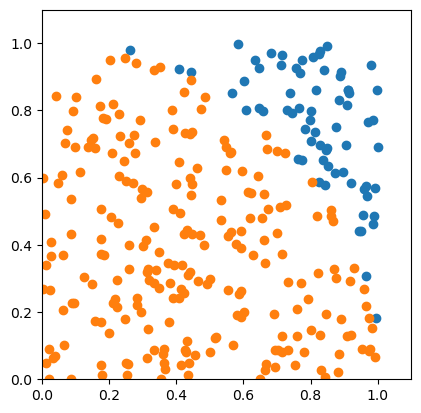

In [23]:
# plot random datapoints outside and inside of unit circle
x_out = x[~in_circle]
y_out = y[~in_circle]

x_in = x[in_circle]
y_in = y[in_circle]

plt.scatter(x_out, y_out)
plt.scatter(x_in, y_in)

plt.xlim([0, 1.1])
plt.ylim([0, 1.1])

ax = plt.gca()
ax.set_aspect(1)

In [25]:
# estimate pi as ratio of points in the circle to all points
n_in = sum(in_circle)
#Area of the circle
A_c = 4 * n_in
#Area of the square
A_s = n

pi_mc = A_c / A_s
pi_mc

error = np.abs(np.pi - pi_mc) / np.pi
100 * error
error

0.031324031235481886

In [11]:
# summarize the above steps in a function
def estimate_pi(n):
    x = np.random.random(n)
    y = np.random.random(n)

    in_circle = x ** 2 + y ** 2 <= 1

    n_in = sum(in_circle)
    #Area of the circle
    A_c = 4 * n_in
    #Area of the square
    A_s = n

    pi = A_c / A_s

    return pi
    

In [13]:
estimate_pi(300)

3.12

In [35]:
# use the function to estimate pi for different n
# calculate and store the estimates of pi in an array
# calculate and store the error of your estimate relative to np.pi in an array
n = np.unique(np.logspace(0, 6, 101).astype(int))

pi_mc = np.empty(np.shape(n), dtype=float)
error = np.empty(np.shape(n), dtype=float)

for ii in range(len(n)):
    pi_mc[ii] = estimate_pi(n[ii])
    error[ii] = np.abs(np.pi - pi_mc[ii])/np.pi

Text(0, 0.5, '$\\pi$')

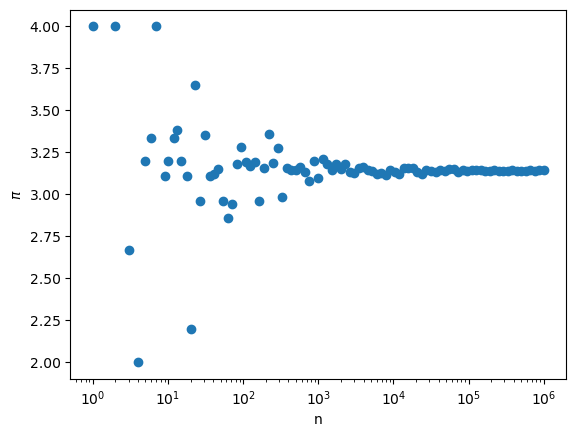

In [43]:
# plot the estimates of pi against n
plt.scatter(n, pi_mc)
plt.xscale("log")
plt.xlabel("n")
plt.ylabel("$\\pi$")

Text(0, 0.5, 'E (%)')

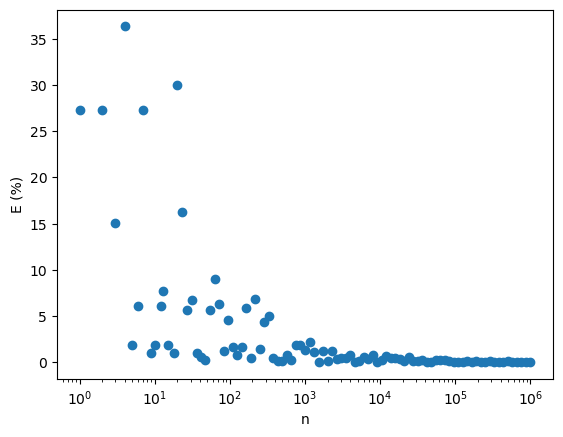

In [45]:
# plot the error of the estimate against n
plt.scatter(n, 100 * error)

plt.xscale("log")
plt.xlabel("n")
plt.ylabel("E (%)")